## **Parcial #2 - Métodos Computacionales:**

Hecho por Claudia Alejandra Cuellar Nieto & Thomas Andrade Hernández.

In [1]:
# Librerías a usar a lo largo de los ejercicios:
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import matplotlib.animation as anim
from matplotlib.patches import Circle, PathPatch, Arc
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import sympy as sym
from tqdm import tqdm

> **21. Funciones como combinaciones lineales de los polinomios de Legendre.**

Una función se puede expresar como combinación lineal de $N + 1$ polinomios de Legendre $P_{n}(x)$, $n = 0, 1, ..., N$.

$$f(x) = \sum_{n = 0}^{N} c_{n} \cdot P_{n}(x)$$

El problema computacional requiere la estimación de los coeficientes de expansión. Sea la función signo:

$$sgn(x) = \left\{ \begin{array}{lcc}
             -1 & \text{ si }  & x < 0. \\
             \\ 0 &  \text{ si } & x = 0. \\
             \\ 1 &  \text{ si } & x > 0. \\
             \end{array}
            \right.$$

**(a). (Theoretical)** Usando relaciones de ortogonalidad de los polinomios de Legendre, muestre que los coeficientes están dados por:

$$ c_{n} = \frac{2n + 1}{2} \cdot \int_{-1}^{1}{f(x)\cdot P_{n}(x)}dx, \quad n = 0, 1, ..., N $$

> **Respuesta teórica:**

Conocemos de antemano la relación de ortogonalidad entre los polinomios de Legendre, la cual nos dice que:

$$\int_{-1}^{1} P_{n}(x) \cdot P_{m}(x) dx = \left\{ \begin{array}{lcc}
                                            & 0 \quad & \text{si} \quad n \neq m\\
                                            \\
                                            & \dfrac{2}{2n + 1} \quad & \text{si} \quad n = m\\
                                            \end{array}
                                            \right.$$

A partir de esta igualdad podemos calcular el valor de los coeficientes generando una serie de transformaciones sobre la combinación lineal. Empezamos eligiendo un valor $m$ tal que $m \in [0, N]$, luego aplicamos el producto interno definido previamente y desarrollamos:

$$f(x) = \sum_{n = 0}^{N} c_{n} \cdot P_{n}(x)dx$$
$$f(x) \cdot P_{m}(x) = \sum_{n = 0}^{N} c_{n} \cdot P_{n}(x) \cdot P_{m}(x)$$
$$\int_{-1}^{1}f(x) \cdot P_{m}(x)dx = \int_{-1}^{1}\sum_{n = 0}^{N} c_{n} \cdot P_{n}(x) \cdot P_{m}(x)dx = \sum_{n = 0}^{N} c_{n} \cdot \int_{-1}^{1} P_{n}(x) \cdot P_{m}(x)dx$$

Dado que para $n \neq m$ la integral se anula, con ello los coeficientes asociados a ese $n$, la igualdad nos resulta en:

$$\int_{-1}^{1}f(x) \cdot P_{m}(x)dx = c_{m} \cdot \int_{-1}^{1} P_{m}(x)^{2}dx = c_{m} \cdot \frac{2}{2n + 1}$$

Despejando $c_{m}$ obtenemos:

$$c_{m} = \frac{2n + 1}{2} \cdot \int_{-1}^{1}f(x) \cdot P_{m}(x)dx$$

Formula que nos permite calcular los coeficientes para el $m$-ésimo término de la combinación lineal.

**(b).** Implemente la función $sgn$.

In [199]:
def sgn_func(x):
    if x > 0:
        return 1
    if x == 0:
        return 0
    if x < 0:
        return -1

**(c).** Vectorice y dibuje la función.

Text(0.5, 0, '$x$')

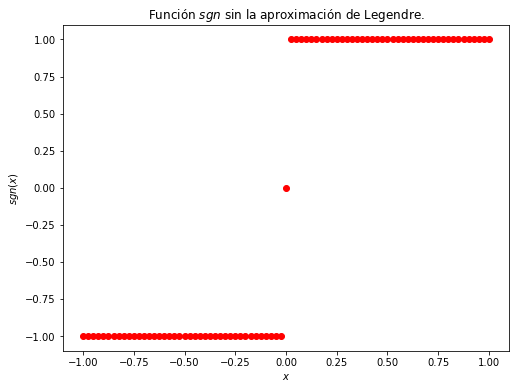

In [200]:
sgn_func = np.vectorize(sgn_func)
x_ = np.linspace(-1, 1, 81)
y_ = sgn_func(x_)

plt.figure(figsize = (8, 6))
plt.scatter(x_, y_, color = 'red')
plt.title(r'Función $sgn$ sin la aproximación de Legendre.')
plt.ylabel(r'$sgn(x)$')
plt.xlabel(r'$x$')

**(d).** Defina los puntos y los pesos de Gauss-Legendre al grado $n = 15$.

In [201]:
xi, wi = np.polynomial.legendre.leggauss(15)

**(e).** Cree y guarde los polinomios de Legendre al grado $N = 20$.

In [202]:
# Primera parte enfocada en encontrar los primeros 20 polinomios de Legendre:

x = sym.symbols('x')

def LegendrePolynomia(n):
    if n >= 0:
        semi_legendre = 1/(2**(n) * np.math.factorial(n))
        main_legendre = (x**2 - 1)**n

        if n >= 1:
            for i in range(1, n + 1):
                main_legendre = sym.diff(main_legendre, x)
        polynomia = sym.simplify(main_legendre * semi_legendre)
        return sym.lambdify([x], polynomia, 'numpy')
    
    else:
        print("El valor de \"n\" digitado no es válido.")


Legendre = np.array([])   

for i in range(0, 21):
    Legendre = np.append(Legendre, LegendrePolynomia(i))

**(f).** Cree una función que calcule los $N + 1$ coeficientes en un array de numpy.

In [203]:
def BothFunction(x, i):
    return sgn_func(x)*Legendre[i](x)

def SearchCoefficients(roots, weights, n):
    coefficients = np.array([])
    for i in range(0, n):
        Integral = np.sum(weights*BothFunction(roots, i))
        value = (2*i + 1)/2 * Integral
        coefficients = np.append(coefficients, value)
    return coefficients

coefficients = SearchCoefficients(xi, wi, 21)
coefficients

array([ 6.93889390e-17,  1.48971231e+00,  1.73472348e-17, -8.38742583e-01,
       -6.24500451e-17,  6.15369232e-01,  4.51028104e-17, -4.68994560e-01,
        0.00000000e+00,  3.48540946e-01,  1.82145965e-17, -2.36219080e-01,
       -4.33680869e-17,  1.22517145e-01,  0.00000000e+00, -1.41908035e-10,
        3.57786717e-17, -1.39529962e-01, -1.60461922e-17,  3.07786741e-01,
        0.00000000e+00])

**(g).** Calcule la combinación lineal para cada valor del dominio que usó para dibujar la función original.

In [204]:
y_approx = np.array([])

for i in range(len(x_)):
    y__ = 0
    for j in range(0, len(coefficients)):
        y__ += coefficients[j]*Legendre[j](x_[i])
    y_approx = np.append(y_approx, y__)

y_approx

array([-1.20044018e+00, -9.35796364e-01, -1.05304350e+00, -1.04292176e+00,
       -9.72348827e-01, -9.41625609e-01, -9.69310149e-01, -1.02036749e+00,
       -1.05409472e+00, -1.05136196e+00, -1.01819091e+00, -9.75434164e-01,
       -9.45148067e-01, -9.40579697e-01, -9.62399655e-01, -1.00060505e+00,
       -1.03983323e+00, -1.06546947e+00, -1.06845425e+00, -1.04762738e+00,
       -1.00940926e+00, -9.65370028e-01, -9.28662263e-01, -9.10386264e-01,
       -9.16783977e-01, -9.47818594e-01, -9.97300390e-01, -1.05435815e+00,
       -1.10579537e+00, -1.13874419e+00, -1.14304017e+00, -1.11286382e+00,
       -1.04739197e+00, -9.50425509e-01, -8.29166559e-01, -6.92470475e-01,
       -5.48974301e-01, -4.05496116e-01, -2.66017167e-01, -1.31421050e-01,
        1.89385317e-17,  1.31421050e-01,  2.66017167e-01,  4.05496116e-01,
        5.48974301e-01,  6.92470475e-01,  8.29166559e-01,  9.50425509e-01,
        1.04739197e+00,  1.11286382e+00,  1.14304017e+00,  1.13874419e+00,
        1.10579537e+00,  

**(h).** Dibuje la representación en la base de Legendre para obtener una imagen similar a la que se encuentra en la página 44 de las notas del curso.

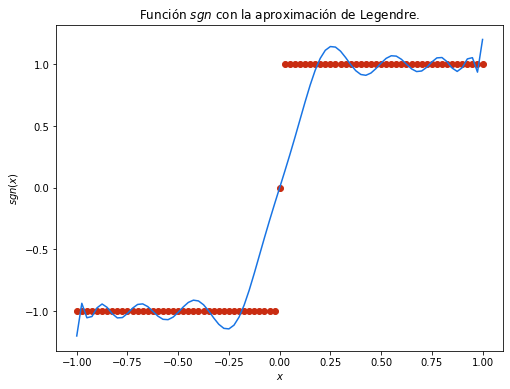

In [205]:
plt.figure(figsize = (8, 6))
plt.scatter(x_, y_, color = '#C92C11')
plt.title(r'Función $sgn$ con la aproximación de Legendre.')
plt.ylabel(r'$sgn(x)$')
plt.xlabel(r'$x$')
plt.plot(x_, y_approx, color = '#1874E4')

> **22. Campo Eléctrico en tres dimensiones.**

**(a). (Theoretical)** Muestre que la solución del campo eléctrico requiere del siguiente conjunto de integrales elípticas (no integrables por métodos convencionales):

$$E_{x}(x, y, z) = \frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(x - a\cos\phi) d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}$$

$$E_{y}(x, y, z) = \frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(y - a\sin\phi) d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}$$

$$E_{z}(x, y, z) = \frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{z d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}$$

Para el cálculo numérico vamos a usar unidades donde $\frac{Q}{4\pi\epsilon_{0}} = 1$ y use $a = 0.5$.


> **Respuesta teórica:**

Primeramente debemos de establecer que el valor del campo eléctrico se encuentra definido por la resolución de la siguiente integral la cual iremos desentrañando poco a poco:

$$\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}} \cdot \int_{L} \frac{\lambda \cdot (\vec{r} - \vec{r}^{*})}{\lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert ^{3}} dl'$$

Estamos trabajando sobre un anillo de radio $a$, lo que nos dice que el valor de $\lambda$ es igual a la carga sobre la longitud de arco, es decir:

$$\lambda = \frac{Q}{2\pi a}$$

También, dado que estamos trabajando con un anillo, el valor de $dl'$ lo podemos igualar de la siguiente manera:

$$dl' = a \cdot d\phi \quad \phi \in (0, 2\pi]$$

Lo que nos permite reescribir la integral inicial como:

$$\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}} \cdot \int_{0}^{2\pi} \frac{Q \cdot (\vec{r} - \vec{r}^{*})}{2\pi a \cdot \lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert ^{3}} \cdot a \cdot d\phi$$
$$ = \frac{1}{4\pi\epsilon_{0}} \cdot \int_{0}^{2\pi} \frac{Q \cdot (\vec{r} - \vec{r}^{*})}{2\pi \cdot \lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert ^{3}} \cdot d\phi$$

Reorganizando algunos términos obtenemos:

$$\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(\vec{r} - \vec{r}^{*})}{\lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert ^{3}} d\phi$$

Ahora, para poder ver cómo se calculan las componentes vamos a operar los términos de la integral por aparte:

$$\vec{r} - \vec{r}^{*} = (x\hat{\textbf{i}} + y\hat{\textbf{j}} + z\hat{\textbf{k}}) - (a\cos\phi\hat{\textbf{i}} + a\sin\phi\hat{\textbf{j}}) = (x - a\cos\phi)\hat{\textbf{i}} + (y - a\sin\phi)\hat{\textbf{j}} +  z\hat{\textbf{k}}$$
$$\lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert = \sqrt{(x - a\cos\phi)^2 + (y - a\sin\phi)^2 + z^2} = \sqrt{x^{2} - 2ax\cos\phi + a^{2}\cos^{2}\phi + y^{2} - 2ay\sin\phi + a^{2}\sin^{2}\phi + z^2}$$
$$ = \sqrt{x^2 + y^2 + z^2 - 2ax\cos\phi - 2ay\sin\phi + \underbrace{a^{2}\cos^{2}\phi + a^{2}\sin^{2}\phi}_{= a^2}}$$
$$\lvert \lvert\vec{r} - \vec{r}^{*} \rvert \rvert = \sqrt{x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi}$$

Con lo anterior solo queda reemplazar:
$$\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(x - a\cos\phi)\hat{\textbf{i}} + (y - a\sin\phi)\hat{\textbf{j}} +  z\hat{\textbf{k}}}{\sqrt{x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi}^{3}} d\phi$$

Por último solo queda separar en las componentes:
$$\vec{E}(\vec{r}) = \underbrace{\frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(x - a\cos\phi) d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}\hat{\textbf{i}}}_{E_{x}(\vec{r})} + \underbrace{\frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{(y - a\sin\phi) d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}\hat{\textbf{j}}}_{E_{y}(\vec{r})} + \underbrace{\frac{1}{4\pi\epsilon_{0}} \cdot \frac{Q}{2\pi} \cdot \int_{0}^{2\pi} \frac{z d\phi}{(x^2 + y^2 + z^2 + a^2 - 2ax\cos\phi - 2ay\sin\phi)^{3/2}}\hat{\textbf{k}}}_{E_{z}(\vec{r})}$$

**(b).** Implemente las funciones que calculan cada componente del campo eléctrico. La función debe tener como entrada el punto $(x, y, z)$ del espacio donde se está calculando. Use una regla de integración adecuada y retorne el valor de la integral.

In [206]:
t = sym.Symbol('t', real = True)
xi, wi = np.polynomial.legendre.leggauss(20)

def ElectricField(x, y, z, component, a = 0.5, tolerance = 6):
    if component == 'x':
        numerator = (x - a*sym.cos(t))
    if component == 'y':
        numerator = (y - a*sym.sin(t))    
    if component == 'z':
        numerator = z
    
    denominator = (x**2 + y**2 + z**2  + a**2 - 2*a*x*sym.cos(t) - 2*a*y*sym.sin(t))**(3/2)
    function = 1/(2*np.pi) * numerator/denominator
    
    field_function = sym.lambdify([t], function, 'numpy')
    value = np.pi * np.sum(wi*field_function(np.pi * (xi + 1)))

    return round(value, tolerance)

*$(c).$* Antes de seguir adelante, verifique que el campo en el punto $\vec{E}(0.6, 0.6, 1) \approx (0.211524, 0.211524, 0.438647)$.

In [207]:
E_t = ElectricField(0.6, 0.6, 1., 'x'), ElectricField(0.6, 0.6, 1., 'y'), ElectricField(0.6, 0.6, 1., 'z')
display(Latex(f'$E(0.6, 0.6, 1)$ = ' + '${}$'.format(E_t)))

<IPython.core.display.Latex object>

$(d.)$ Ahora calcule el campo en cada punto generando particiones de $N = 6$ en cada eje, para el intervalo entre $-0.6$ y $0.6$.

In [208]:
x = np.linspace(-0.6, 0.6, 6)
y = np.linspace(-0.6, 0.6, 6)
z = np.linspace(-0.6, 0.6, 6)

$(e).$ Defina los tensores de la forma $\verb|E_{i} = np.zeros((N, N, N))|$.

In [209]:
Ex = np.zeros((6, 6, 6))
Ey = np.zeros((6, 6, 6))
Ez = np.zeros((6, 6, 6))

for i in range(len(Ex)):
    for j in range(len(Ey)):
        for k in range(len(Ez)):
            Ex[i, j, k] = ElectricField(x[i], y[j], z[k], 'x')
            Ey[i, j, k] = ElectricField(x[i], y[j], z[k], 'y')
            Ez[i, j, k] = ElectricField(x[i], y[j], z[k], 'z')
            

$(f).$ Grafique el campo vectorial usando el método quiver:

$$\verb|ax.quiver(i, j, k, Ex[i, j, k], Ey[i, j, k], Ez[i, j, k])|$$

Debería de obtener una imagen semejante a la que se encuentra en la página 47 de las notas de la clase.

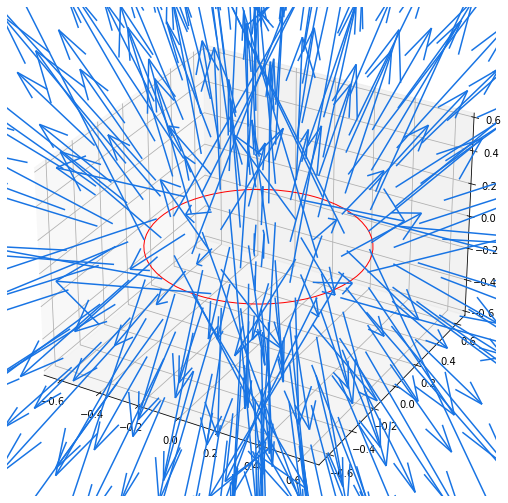

In [214]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111)

plt.xlabel(r'$x[cm]$',fontsize=10)
plt.ylabel(r'$y[cm]$',fontsize=10)
plt.title(r'Campo de Eléctrico.')
for i in range(len(Ex)):
    for j in range(len(Ey)):
        for k in range(len(Ez)):
            ax = plt.subplot(111, projection = '3d')
            ax.quiver(x[i], y[j], z[k], Ex[i, j, k],  Ey[i, j, k]   ,  Ez[i, j, k], color = '#1874E4')

p = Circle((0, 0), 0.5, fill = None, color = 'red')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z = 0, zdir = "z")



$(g).$ Imprima el mapa del campo eléctrico $E_{x}$ y $E_{y}$ en $z = 0.6$.

In [211]:
Ex_ = np.zeros((6, 6))
Ey_ = np.zeros((6, 6))

for i in range(0, len(Ex_[0:])):
    for j in range(0, len(Ex_[0:])):
        Ex_[i, j] = round(ElectricField(x[i], y[j], 0.6, 'x'), 5)
        Ey_[i, j] = round(ElectricField(x[i], y[j], 0.6, 'y'), 5)

In [212]:
display(Latex(f'$E_x = $'))
sym.simplify(Ex_)

<IPython.core.display.Latex object>

[[-0.44648, -0.53805, -0.57663, -0.57663, -0.53805, -0.44648], [-0.32283, -0.35779, -0.34807, -0.34807, -0.35779, -0.32283], [-0.11532, -0.11602, -0.10229, -0.10229, -0.11602, -0.11532], [0.11533, 0.11602, 0.10229, 0.10229, 0.11602, 0.11533], [0.32283, 0.35779, 0.34807, 0.34807, 0.35779, 0.32283], [0.44648, 0.53804, 0.57663, 0.57663, 0.53804, 0.44648]]

In [213]:
display(Latex(f'$E_y = $'))
sym.simplify(Ey_)

<IPython.core.display.Latex object>

[[-0.44649, -0.32282, -0.11532, 0.11532, 0.32282, 0.44649], [-0.53804, -0.35779, -0.11602, 0.11602, 0.35779, 0.53804], [-0.57663, -0.34807, -0.10229, 0.10229, 0.34807, 0.57663], [-0.57663, -0.34807, -0.10229, 0.10229, 0.34807, 0.57663], [-0.53804, -0.35779, -0.11602, 0.11602, 0.35779, 0.53804], [-0.44648, -0.32283, -0.11533, 0.11533, 0.32283, 0.44648]]

> **Método de MonteCarlo:**

$6.$ Usando la generación de puntos sobre una esfera estime los momentos de inercia de la esfera respecto a los ejes de rotación $I_{xx}$, $I_{yy}$, $I_{zz}$. Los momentos están dados por:

$$I_{xx} = \int_{V} (y^2 + z^2)dxdydz$$
$$I_{yy} = \int_{V} (x^2 + z^2)dxdydz$$
$$I_{zz} = \int_{V} (x^2 + y^2)dxdydz$$

En este problema estamos asumiendo que la densidad de la esfera es $\rho = 1 kg/m^3$ con volumen unitario. Usando el método de MonteCarlo las integrales se pueden estimar como (por ejemplo para $I_{xx}$):

$$I_{xx} \approx \frac{1}{N} \cdot \sum_{n = 0}^{N}(y[i]^2 + z[i]^2)$$

Adicionalmente estime el producto de inercia $I_{xy}$:

$$I_{xy} = - \int_{V}dxdydz$$


In [2]:
#Puntos aleatorios
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in tqdm(range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

In [3]:
N =100000
Sphere = CreateSphere(N)

100%|██████████| 100000/100000 [00:01<00:00, 76734.94it/s]


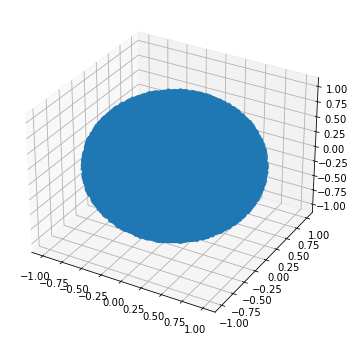

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])

In [5]:
#Momentos de inercia

def Ixx(y,z):
    return y**2 + z**2

def Iyy(x,z):
    return x**2 + z**2

def Izz(x,y):
    return x**2 + y**2

def Ixy(x,y):
    return x*y


def GetMomentum(a):
    suma = 0
    if a=='x':
        for i in range(N):
            suma = suma + Ixx(Sphere[i][1],Sphere[i][2])
            
    if a=='y':
        for i in range(N):
            suma = suma + Iyy(Sphere[i][0],Sphere[i][2])
            
    if a=='z':
        for i in range(N):
            suma = suma + Izz(Sphere[i][0],Sphere[i][1])
    
    if a=='xy':
        for i in range(N):
            suma = suma + Ixy(Sphere[i][0],Sphere[i][1])
        suma = -suma
    
    promedio = suma/N
    
    return promedio

In [6]:
print("El valor esperado de la integral es: {}, el momento de inercia para x: {}, el momento de inercia para y: {}, el momento de inercia para z: {}".format((2/5),GetMomentum('x'),GetMomentum('y'),GetMomentum('z')))

El valor esperado de la integral es: 0.4, el momento de inercia para x: 0.3989905352541334, el momento de inercia para y: 0.3984512633895512, el momento de inercia para z: 0.39926508214560347


In [7]:
print("El producto inercial es: {}".format(GetMomentum('xy')))

El producto inercial es: -0.0006509456556221939


$\circ$ ¿Qué se puede concluir de la rotación de la esfera?

Dado que los valores de la diagonal principal del tensor de momento de inercia son los únicos no-nulos, es posible concluir que rotar una esfera con respecto a su centro no genera ningún cambio significativo en la posición espacial del cuerpo, es decir, generar cualquier tipo de rotación en el centro de una esfera es un evento totalmente despreciable al no generar ningún cambio significativo en el sistema.